In [40]:
#!pip install --upgrade tensorflow
!pip install keras==2.12.0


In [41]:
#pip install numpy pandas scikit-learn tensorflow


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
#from tensorflow.keras import layers  # Modify this line
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense,Dropout

In [43]:
dataset =  pd.read_csv('/content/drive/MyDrive/AI Flood Alert Chatbot (1)/Metrological datasets/Sukkur_Daily_Data.csv')
print(dataset)

                 date_time  maxtempC  mintempC  totalSnow_cm  sunHour  \
0      2009-01-01 00:00:00        23        13             0       10   
1      2009-01-01 03:00:00        23        13             0       10   
2      2009-01-01 06:00:00        23        13             0       10   
3      2009-01-01 09:00:00        23        13             0       10   
4      2009-01-01 12:00:00        23        13             0       10   
...                    ...       ...       ...           ...      ...   
43803  2023-12-30 09:00:00        27        16             0       10   
43804  2023-12-30 12:00:00        27        16             0       10   
43805  2023-12-30 15:00:00        27        16             0       10   
43806  2023-12-30 18:00:00        27        16             0       10   
43807  2023-12-30 21:00:00        27        16             0       10   

       uvIndex  moon_illumination  moonrise   moonset   sunrise  ...  \
0            5                 31  10:14 AM  10:02 

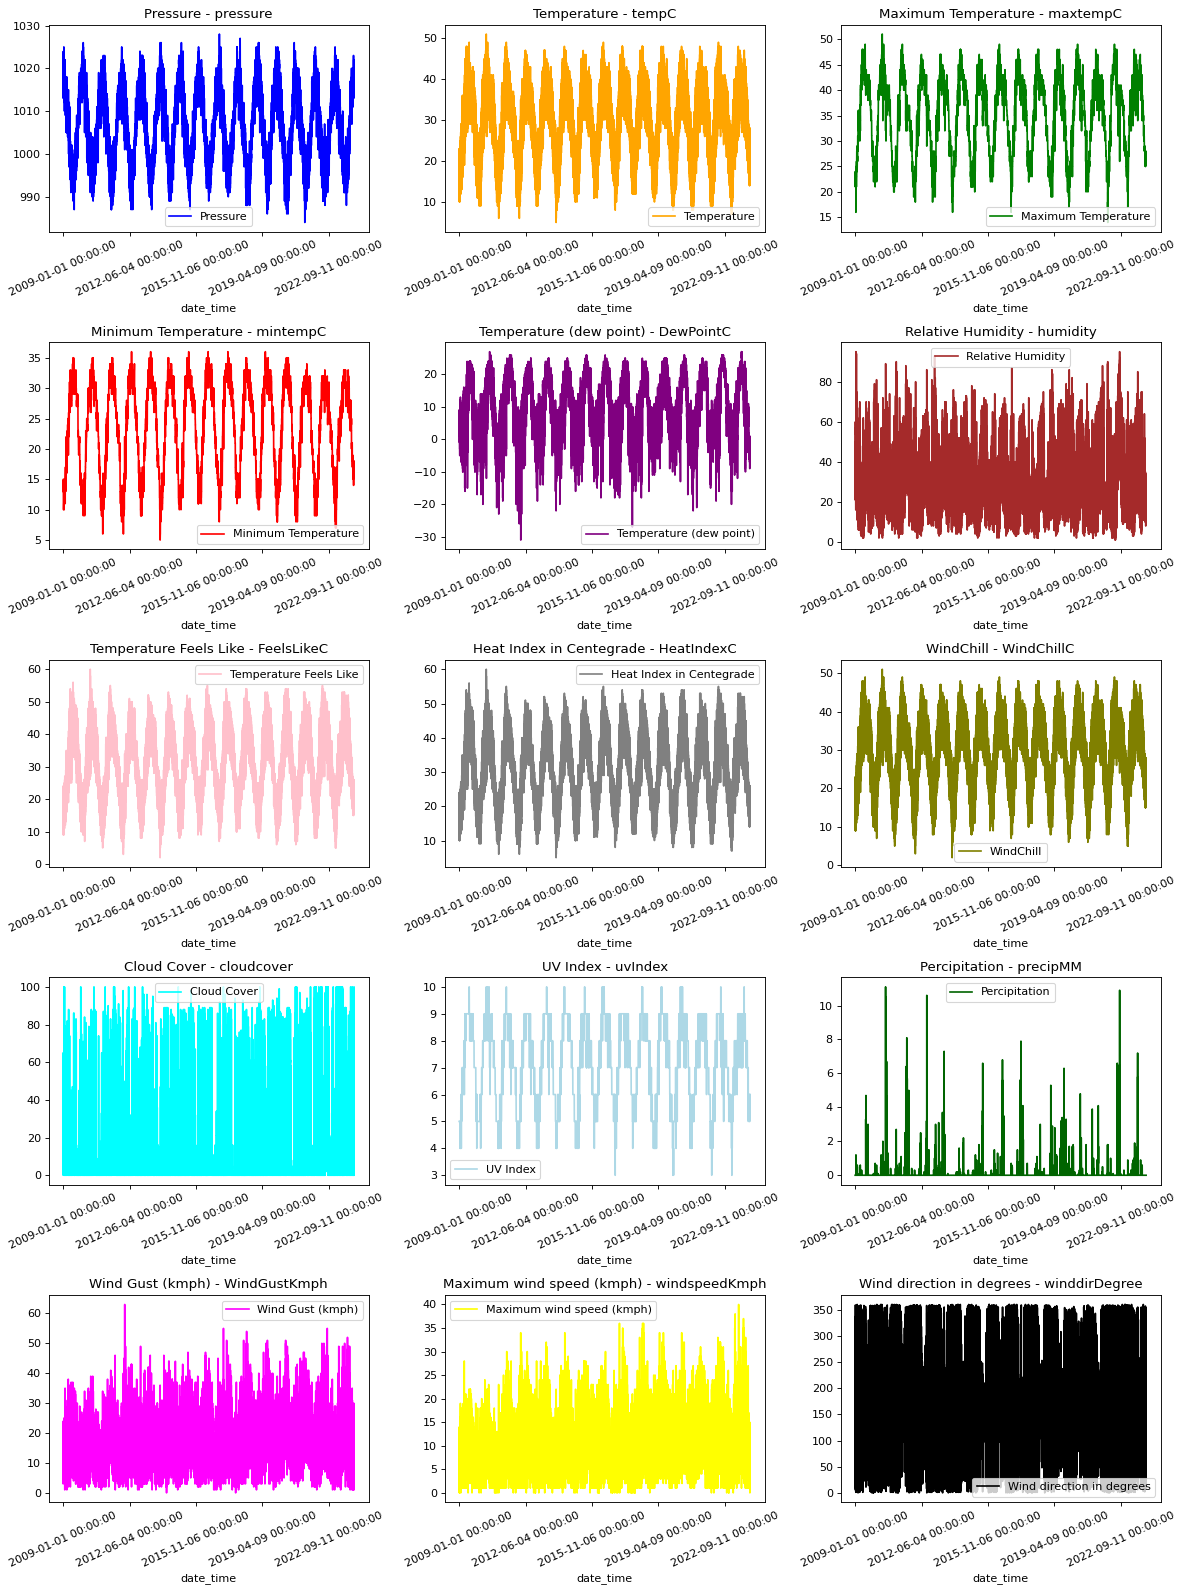

In [44]:
titles = [
    "Pressure",
    "Temperature",
    "Maximum Temperature",
    "Minimum Temperature",
    "Temperature (dew point)",
    "Relative Humidity",
    "Temperature Feels Like",
    "Heat Index in Centegrade",
    "WindChill",
    "Cloud Cover",
    "UV Index",
    "Percipitation",
    "Wind Gust (kmph)",
    "Maximum wind speed (kmph)",
    "Wind direction in degrees",
]

feature_keys = [
    "pressure",
    "tempC",
    "maxtempC",
    "mintempC",
    "DewPointC",
    "humidity",
    "FeelsLikeC",
    "HeatIndexC",
    "WindChillC",
    "cloudcover",
    "uvIndex",
    "precipMM",
    "WindGustKmph",
    "windspeedKmph",
    "winddirDegree",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "lightblue",
    "darkgreen",
    "magenta",
    "yellow",
    "black",
]

date_time_key = "date_time"



def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=5, ncols=3, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = axes[i // 3, i % 3]  # Corrected indexing
        t_data.plot(ax=ax, color=c, title="{} - {}".format(titles[i], key), rot=25)
        ax.legend([titles[i]])
    plt.tight_layout()
    plt.show()

# Assuming 'dataset' is your DataFrame
show_raw_visualization(dataset)



In [45]:
dataset.describe().round(2)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,43808.00,43808.00,43808.0,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00,43808.00
mean,35.50,23.57,0.0,11.86,7.29,46.16,9.89,30.33,30.42,29.12,17.18,8.55,26.99,0.02,1006.62,29.16,9.97,161.88,10.39
std,7.44,7.41,0.0,1.71,1.53,31.26,8.98,10.02,9.92,8.69,7.53,17.27,15.47,0.27,8.31,8.61,0.28,86.70,5.37
min,14.00,5.00,0.0,1.00,3.00,0.00,-31.00,2.00,5.00,2.00,0.00,0.00,1.00,0.00,984.00,5.00,2.00,0.00,0.00
25%,29.00,17.00,0.0,11.00,6.00,18.00,3.00,23.00,24.00,23.00,12.00,0.00,15.00,0.00,1000.00,23.00,10.00,91.00,6.00
50%,37.00,25.00,0.0,12.00,8.00,46.00,9.00,30.00,30.00,30.00,16.00,2.00,24.00,0.00,1007.00,30.00,10.00,165.00,10.00
75%,42.00,30.00,0.0,13.00,9.00,73.00,18.00,38.00,38.00,36.00,22.00,8.00,36.00,0.00,1014.00,36.00,10.00,203.00,13.00
max,51.00,36.00,0.0,14.00,10.00,100.00,27.00,60.00,60.00,51.00,63.00,100.00,95.00,11.10,1028.00,51.00,10.00,360.00,40.00


In [46]:
#dataset.head()
result_df = dataset
result_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2009-01-01 00:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,7,6,46,0.0,1017,15,10,63,3,Sukkur
1,2009-01-01 03:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,10,8,47,0.0,1016,13,10,65,5,Sukkur
2,2009-01-01 06:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,11,2,46,0.0,1018,14,10,99,5,Sukkur
3,2009-01-01 09:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,3,4,28,0.0,1019,18,10,49,3,Sukkur
4,2009-01-01 12:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,9,32,23,0.0,1016,22,10,82,5,Sukkur


In [47]:
# Separate features (X) and target variable (Y)
X = result_df.drop(['precipMM', 'moon_illumination', 'totalSnow_cm', 'moonrise', 'moonset', 'sunrise', 'sunset', 'visibility', 'sunHour', 'date_time', 'location'], axis=1)
Y = result_df['precipMM'].values.reshape(-1, 1)

In [48]:
X.head()

,maxtempC,mintempC,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,winddirDegree,windspeedKmph
0,23,13,5,3,16,15,16,7,6,46,1017,15,63,3
1,23,13,5,2,13,13,13,10,8,47,1016,13,65,5
2,23,13,5,3,15,14,15,11,2,46,1018,14,99,5
3,23,13,5,8,18,18,18,3,4,28,1019,18,49,3
4,23,13,5,9,22,24,22,9,32,23,1016,22,82,5


In [49]:
print(X)
print(Y)

       maxtempC  mintempC  uvIndex  DewPointC  FeelsLikeC  HeatIndexC  \
0            23        13        5          3          16          15   
1            23        13        5          2          13          13   
2            23        13        5          3          15          14   
3            23        13        5          8          18          18   
4            23        13        5          9          22          24   
...         ...       ...      ...        ...         ...         ...   
43803        27        16        6         -1          19          19   
43804        27        16        6         -2          24          24   
43805        27        16        6         -2          25          25   
43806        27        16        6         -2          22          22   
43807        27        16        6         -1          20          20   

       WindChillC  WindGustKmph  cloudcover  humidity  pressure  tempC  \
0              16             7           6      

In [50]:
# X_scaled_df = pd.DataFrame(X_scaled)
# description = X_scaled_df.describe().round(2)
# description

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_S = scaler.fit_transform(X)



# X_scaled_dfM = pd.DataFrame(X_mm_Scalled)
# description = X_scaled_dfM.describe().round(2)
# description

In [52]:
# Split the data into training, validation, and testing sets
#X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X_S, Y, test_size=0.3, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train1, Y_train1, test_size=0.28, random_state=42)

In [53]:
def build_regressor():
    model = Sequential()
    model.add(Dense(units=14, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.4))
   # model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
   # model.add(Dropout(0.4))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['mae'])
    return model


In [54]:
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=70, verbose=0)


<ipython-input-54-0c534d214c5d>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=70, verbose=0)


In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


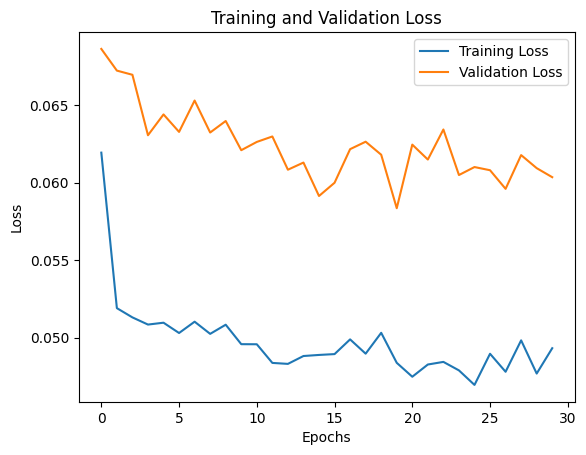

Test Score for Fold: 0.06973846450916689


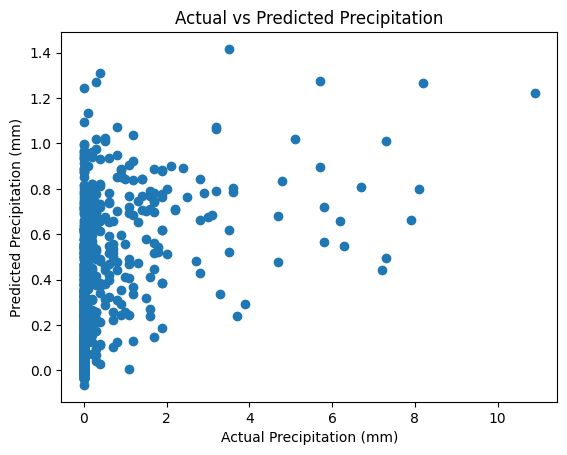

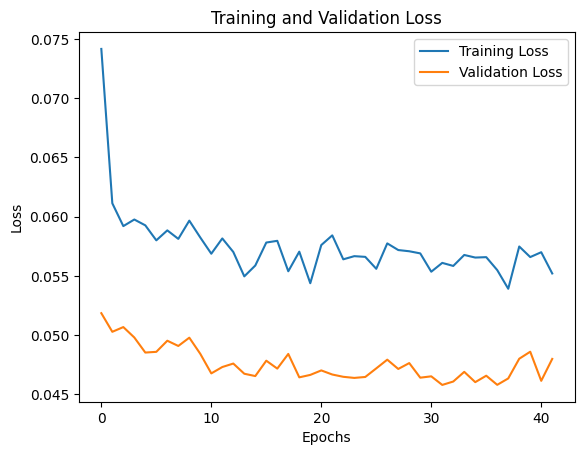

Test Score for Fold: 0.07366798855860225


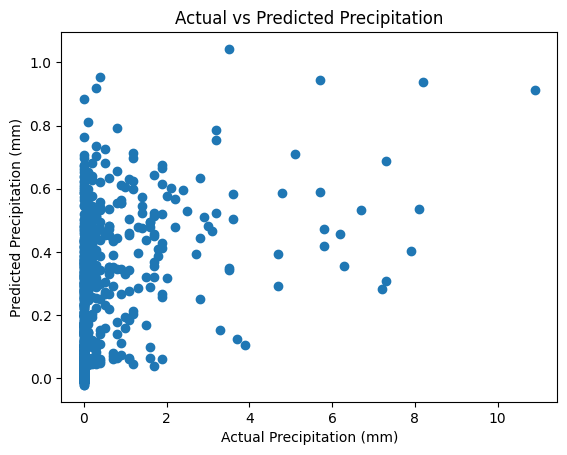

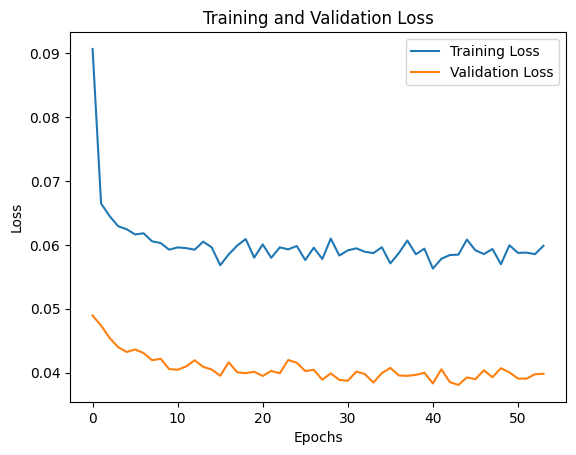

Test Score for Fold: 0.07416554558288507


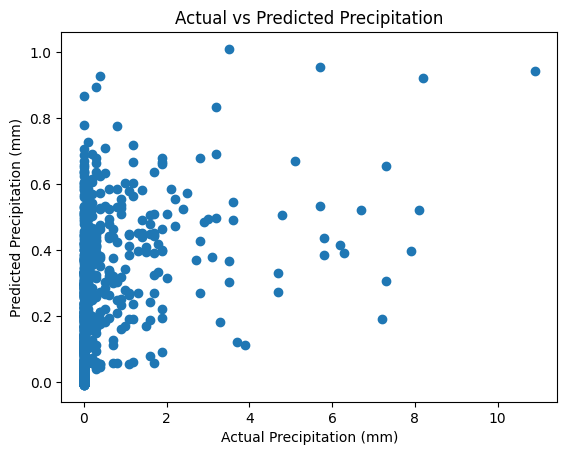

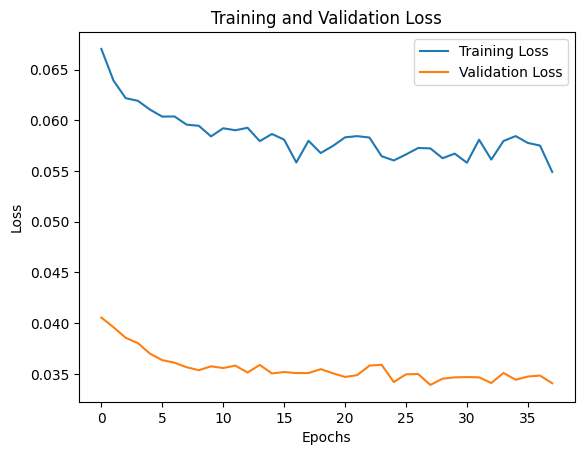

Test Score for Fold: 0.07093719604789449


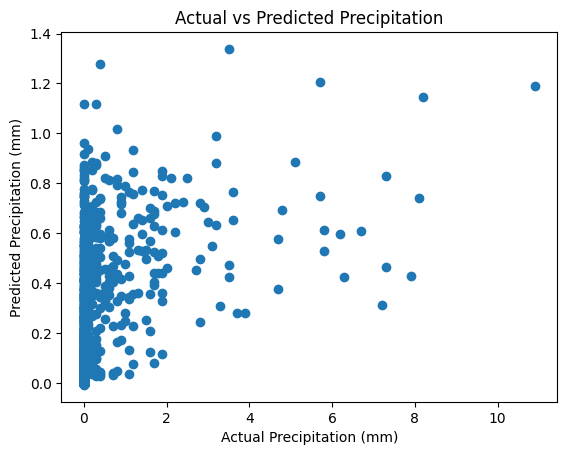

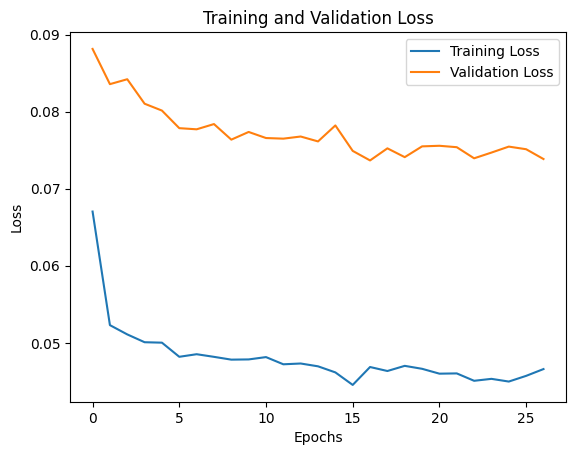

Test Score for Fold: 0.07224745069591337


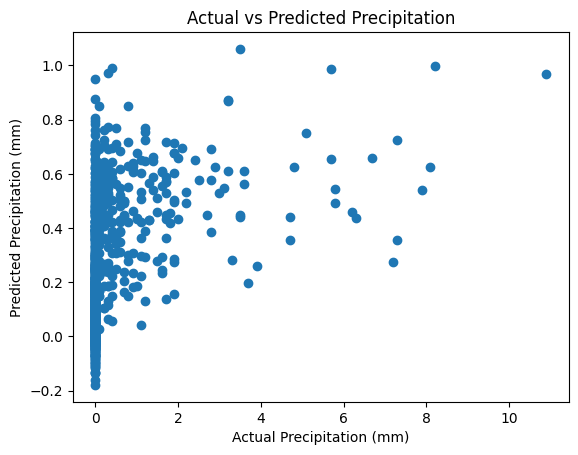

In [56]:
from sklearn.model_selection import KFold
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Train the model for each fold with EarlyStopping
    history = regressor.fit(X_train_fold, Y_train_fold, validation_data=(X_val_fold, Y_val_fold), callbacks=[early_stopping])

    # Plot training and validation losses
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Predict on the test set for each fold
    y_pred = regressor.predict(X_test_scaled)

    # Evaluate the model on the test set
    test_score = mean_squared_error(Y_test, y_pred)
    print(f"Test Score for Fold: {test_score}")

    # Plot actual vs predicted values
    plt.scatter(Y_test, y_pred)
    plt.xlabel('Actual Precipitation (mm)')
    plt.ylabel('Predicted Precipitation (mm)')
    plt.title('Actual vs Predicted Precipitation')
    plt.show()

In [57]:
# print(X_train_fold.shape)
# print(y_train_fold.shape)
# print(X_train1.shape)
# print(Y_train1.shape)
# print(X_val_fold.shape)
# print(y_val_fold.shape)
# print(X_test.shape)
# print(y_test.shape)

In [58]:
# X_train.shape[1]

In [59]:
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras import regularizers
# def build_regressor():
#     regressor = Sequential()
#     regressor.add(Dense(units=17, input_dim=X_train.shape[1], activation='elu', kernel_regularizer=regularizers.l2(0.01)))
#     regressor.add(Dropout(0.5))
#     regressor.add(Dense(units=32, activation='elu', kernel_regularizer=regularizers.l2(0.01)))
#     regressor.add(Dense(units=1, activation='linear'))
#     regressor.compile(optimizer='RMSprop', loss='MeanAbsoluteError', metrics=['MeanAbsoluteError'])
#     return regressor

In [60]:
# # Custom KerasRegressor wrapper
# def custom_keras_regressor():
#     return KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=200)

In [61]:
# # Create the KerasRegressor using the custom wrapper
# regressor = custom_keras_regressor()

In [62]:
# # Train the model
# history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val))

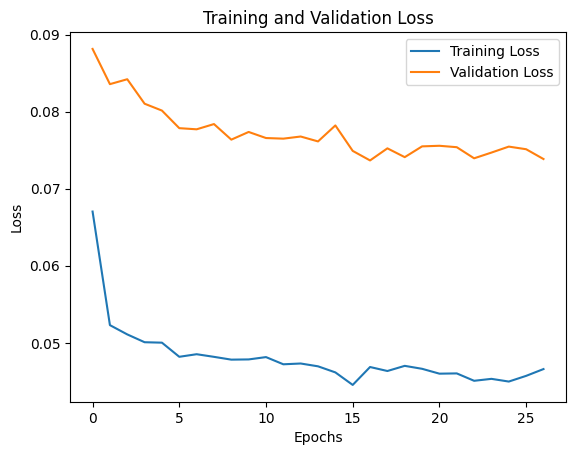

In [63]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

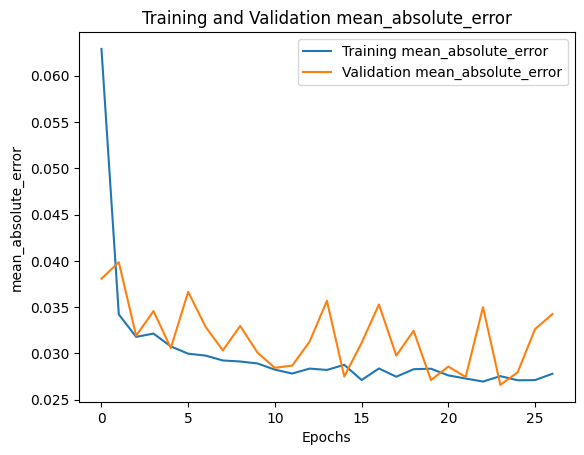

In [64]:
# Plot training loss and validation loss
plt.plot(history.history['mae'], label='Training mean_absolute_error')
plt.plot(history.history['val_mae'], label='Validation mean_absolute_error')
plt.title('Training and Validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

test_predictions = regressor.predict(X_test)

# Calculate the mean squared error
test_loss = mean_squared_error(Y_test, test_predictions)
print("Test Loss:", test_loss)

Test Loss: 0.07217135640995632


In [66]:
predicted = regressor.predict(X_test)

In [67]:
for i in range(2000, 2050):
  print(f'Actual: {Y_test[i][0]} : Predicted {predicted[i]}')

Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.4 : Predicted 0.9944928288459778
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 1.7 : Predicted 0.45453187823295593
Actual: 0.0 : Predicted 0.006273107137531042
Actual: 0.0 :

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


predictions = regressor.predict(X_test)

# Assuming Y_test contains the actual rainfall values for your test data
# Evaluate regression metrics
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')


MAE: 0.034966216415216037, MSE: 0.07217135640995632, RMSE: 0.268647271361457, R2: 0.2041236550566703
